In [1]:
## Import packages
import pandas as pd
import numpy as np
import os

In [2]:
pwd

'/Users/lye/Downloads/MDA'

In [3]:
## Check the path of datasets
path = "./data"
files = os.listdir(path)
files

['mug_locations.parquet.gzip',
 'interventions_bxl2.parquet.gzip',
 'pit_locations.parquet.gzip',
 'interventions_bxl.parquet.gzip',
 'interventions1.parquet.gzip',
 'cad9.parquet.gzip',
 'aed_locations.parquet.gzip',
 'interventions2.parquet.gzip',
 'ambulance_locations.parquet.gzip',
 'interventions3.parquet.gzip']

In [4]:
## Read intervention data

itv_bxl2 = pd.read_parquet(path + '/' + files[1], engine='pyarrow')
itv_bxl1 = pd.read_parquet(path + '/' + files[3], engine='pyarrow')
itv1 = pd.read_parquet(path + '/' + files[4], engine='pyarrow')
itv_cad = pd.read_parquet(path + '/' + files[5], engine='pyarrow')
itv2 = pd.read_parquet(path + '/' + files[7], engine='pyarrow')
itv3 = pd.read_parquet(path + '/' + files[9], engine='pyarrow')

In [5]:
itvs = [itv_bxl1, itv_bxl2, itv1, itv2, itv3, itv_cad]

for df in itvs:
    df.info() ## Check information of each intervention dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115647 entries, 0 to 115646
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   mission_id                        115647 non-null  int64  
 1   service_name                      115647 non-null  object 
 2   postalcode_permanence             115647 non-null  int64  
 3   cityname_permanence               115647 non-null  object 
 4   streetname_permanence             115647 non-null  object 
 5   housenumber_permanence            2230 non-null    object 
 6   latitude_permanence               115647 non-null  int64  
 7   longitude_permanence              115647 non-null  int64  
 8   permanence_short_name             115647 non-null  object 
 9   permanence_long_name              115647 non-null  object 
 10  vector_type                       115647 non-null  object 
 11  eventtype_firstcall               115647 non-null  o

In [6]:
itv_bxl1

,mission_id,service_name,postalcode_permanence,cityname_permanence,streetname_permanence,housenumber_permanence,latitude_permanence,longitude_permanence,permanence_short_name,permanence_long_name,...,postalcode_destination_hospital,cityname_destination_hospital,streetname_destination_hospital,housenumber_destination_hospital,calculated_traveltime_departure_,calculated_distance_departure_to,calculated_traveltime_destinatio,calculated_distance_destination_,number_of_transported_persons,abandon_reason
0,20222490011,FB PDS BRUX [PASI CitÈ] SIAMU,1000,Brussel (Brussel),Vesaliusstraat,None,5085097,436411,ABBRUX11A,AMB CITE 2,...,NaN,None,None,NaN,92.0,784.0,NaN,NaN,NaN,Error
1,20222490011,FB PDS BRUX [PASI CitÈ] SIAMU,1000,Brussel (Brussel),Vesaliusstraat,None,5085097,436411,ABBRUX03A,AMB HELI 3,...,1000.0,Brussel (Brussel),Broekstraat,NaN,92.0,784.0,136.0,1330.0,NaN,None
2,20222490012,HB UR BRUX CHU St Pierre,1000,Brussel (Brussel),Rue Haute,None,508343302,43454504,ABBRUX06A,AMB HSP 1,...,NaN,None,None,NaN,28.0,228.0,NaN,NaN,NaN,Error
3,20222490015,FB PDS BRUX [PASI CitÈ] SIAMU,1000,Brussel (Brussel),Vesaliusstraat,None,5085097,436411,ABBRUX03A,AMB HELI 3,...,NaN,None,None,NaN,8.0,58.0,NaN,NaN,NaN,Weigering van vervoer
4,20222490019,FB PDS WOLL [PASI UCL] SIAMU,1200,Woluwe-Saint-Lambert (Woluwe-Saint-Lambert),Avenue Hippocrate - Hippokrateslaan,None,5085211,44604,ABWOLL01A,AMB UCL 1,...,NaN,None,None,NaN,152.0,1905.0,NaN,NaN,NaN,Geannuleerd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115642,20231510397,FB PDS BRUX [PASI CitÈ] SIAMU,1000,Brussel (Brussel),Vesaliusstraat,None,5085097,436411,ABBRUX10A,AMB CITE 1,...,NaN,None,None,NaN,173.0,1889.0,NaN,NaN,NaN,Weigering van vervoer
115643,20231510397,FB PDS BRUX [PASI CitÈ] SIAMU,1000,Brussel (Brussel),Vesaliusstraat,None,5085097,436411,ABBRUX11A,AMB CITE 2,...,NaN,None,None,NaN,173.0,1889.0,NaN,NaN,NaN,Error
115644,20231510399,FB PDS ANDE [PASI Anderlecht] SIAMU,1070,Anderlecht,Bergense Steenweg,None,5083254,431199,ABANDE01A,AMB AND 1,...,NaN,None,None,NaN,94.0,967.0,NaN,NaN,NaN,Error
115645,20231510399,FB PDS ANDE [PASI Anderlecht] SIAMU,1070,Anderlecht,Bergense Steenweg,None,5083254,431199,ABANDE04A,AMB AND 4,...,1070.0,Anderlecht (Anderlecht),Jules Graindorlaan,66.0,94.0,967.0,151.0,1447.0,NaN,None


In [7]:
for df in itvs:
    df.columns = [col.strip() for col in df.columns]
    df.rename(columns=lambda x: x.lower(), inplace=True)
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

    print(df.columns)
    print(len(df.columns)) ## Check the variable names and the number of variables in each dataset

Index(['mission_id', 'service_name', 'postalcode_permanence',
       'cityname_permanence', 'streetname_permanence',
       'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
       'permanence_short_name', 'permanence_long_name', 'vector_type',
       'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
       'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
       'latitude_intervention', 'longitude_intervention', 't0', 't1',
       't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 't9',
       'intervention_time_t1reported', 'waiting_time', 'intervention_duration',
       'departure_time_t1reported', 'unavailable_time',
       'name_destination_hospital', 'postalcode_destination_hospital',
       'cityname_destination_hospital', 'streetname_destination_hospital',
       'housenumber_destination_hospital', 'calculated_traveltime_departure_',
       'calculated_distance_departure_to', 'calculated_traveltime_destinatio',
       '

In [8]:
itv_bxl1[['vector_type',
       'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
       'eventlevel_trip', 'waiting_time', 'intervention_duration',
       'departure_time_t1reported', 'unavailable_time']]

,vector_type,eventtype_firstcall,eventlevel_firstcall,eventtype_trip,eventlevel_trip,waiting_time,intervention_duration,departure_time_t1reported,unavailable_time
0,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,NaN,NaN,NaN,NaN
1,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,18.0,NaN,5.0,NaN
2,Ambulance,P059 - Dizziness - Nausea,N5,P059 - Dizziness - Nausea,N5,NaN,NaN,NaN,NaN
3,Ambulance,P019 - Unconscious - syncope,N5,P019 - Unconscious - syncope,N5,NaN,17.0,1.0,NaN
4,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115642,Ambulance,P069 - Wounds,N5,P069 - Wounds,N5,9.0,18.0,3.0,NaN
115643,Ambulance,P069 - Wounds,N5,P069 - Wounds,N5,NaN,NaN,NaN,NaN
115644,Ambulance,P002 - Agression - fight - rape,N5,P002 - Agression - fight - rape,N5,NaN,NaN,NaN,NaN
115645,Ambulance,P002 - Agression - fight - rape,N5,P002 - Agression - fight - rape,N5,6.0,43.0,4.0,NaN


In [9]:
itv_bxl2[['description_nl', 'ic_description_nl',
       'eventtype_and_eventlevel', 'permanence_short_name_nl',
       'permanence_short_name_fr', 'service_name_nl', 'service_name_fr']]

,description_nl,ic_description_nl,eventtype_and_eventlevel,permanence_short_name_nl,permanence_short_name_fr,service_name_nl,service_name_fr
0,Nieuwe melding,Medisch,P033 N05 - TRAUMA,A-STMICHEL,A-STMICHEL,ST-MICHEL (MED),ST-MICHEL (MED)
1,Nieuwe melding,Medisch,P032 N05 - ALLERGISCHE REACTIE,A-CIT2,A-CIT2,CITE (MED),CITE (MED)
2,Nieuwe melding,Medisch,P010 N01 - ADEMHALINGSMOEILIJKHEDEN,A-EM2,A-EM2,Heliport (MED),Heliport (MED)
3,Nieuwe melding,Medisch,P010 N01 - ADEMHALINGSMOEILIJKHEDEN,M-HSP,M-HSP,HSP (MED),HSP (MED)
4,Nieuwe melding,Medisch,P039 N05 - CARDIAAL PROBLEEM (ANDERE DAN PIJN ...,A-CIT1,A-CIT1,CITE (MED),CITE (MED)
...,...,...,...,...,...,...,...
38615,Nieuwe melding,Medisch,P011 N01 - PIJN OP DE BORST,M-SJ,M-SJ,STJEAN (MED),STJEAN (MED)
38616,Nieuwe melding,Medisch,P096 Buitendienststelling,A-AND4,A-AND4,Anderlecht (MED),Anderlecht (MED)
38617,Nieuwe melding,Medisch,P015 N01 - EPILEPSIE - STUIPEN,A-ELI,A-ELI,St-Elisabeth (MED),St-Elisabeth (MED)
38618,Nieuwe melding,Medisch,P015 N01 - EPILEPSIE - STUIPEN,M-HSP,M-HSP,HSP (MED),HSP (MED)


In [10]:
## extract event_level & event_type from eventtype_and_eventlevel

itv_bxl2['eventlevel_trip'] = itv_bxl2['eventtype_and_eventlevel'].str.extract('(N\d{2})', expand=False)
itv_bxl2['eventtype_trip'] = itv_bxl2['eventtype_and_eventlevel'].str.replace(r'N\d{2}\s*-\s*', '', regex=True)

# rename columns_nl and remove columns_fr
itv_bxl2.rename(columns={'service_name_nl': 'service_name', 'permanence_long_name_nl': 'permanence_long_name',
                            'permanence_short_name_nl': 'permanence_short_name', 'vector_type_nl': 'vector_type', 
                            'abandon_reason_nl': 'abandon_reason'}, inplace=True)

cols_to_drop = ['service_name_fr', 'permanence_long_name_fr', 'permanence_short_name_fr','vector_type_fr',
        'eventtype_and_eventlevel','description_nl','ic_description_nl','creationtime','abandon_reason_fr']

itv_bxl2.drop(columns=cols_to_drop, inplace=True)

itv_bxl2.columns

Index(['mission_id', 't0', 'cityname_intervention', 'longitude_intervention',
       'latitude_intervention', 'number_of_transported_persons',
       'permanence_long_name', 'permanence_short_name', 'service_name',
       'cityname_permanence', 'streetname_permanence',
       'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
       'vector_type', 'name_destination_hospital',
       'cityname_destination_hospital', 'streetname_destination_hospital',
       'housenumber_destination_hospital', 'abandon_reason', 't1', 't2', 't3',
       't4', 't5', 't6', 't7', 'eventlevel_trip', 'eventtype_trip'],
      dtype='object')

In [11]:
itv_bxl1.columns

Index(['mission_id', 'service_name', 'postalcode_permanence',
       'cityname_permanence', 'streetname_permanence',
       'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
       'permanence_short_name', 'permanence_long_name', 'vector_type',
       'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
       'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
       'latitude_intervention', 'longitude_intervention', 't0', 't1',
       't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 't9',
       'intervention_time_t1reported', 'waiting_time', 'intervention_duration',
       'departure_time_t1reported', 'unavailable_time',
       'name_destination_hospital', 'postalcode_destination_hospital',
       'cityname_destination_hospital', 'streetname_destination_hospital',
       'housenumber_destination_hospital', 'calculated_traveltime_departure_',
       'calculated_distance_departure_to', 'calculated_traveltime_destinatio',
       '

In [12]:
np.intersect1d(itv_bxl1.columns, itv_bxl2.columns), len(np.intersect1d(itv_bxl1.columns, itv_bxl2.columns)) ## check the intersection of datasets' columns

(array(['abandon_reason', 'cityname_destination_hospital',
        'cityname_intervention', 'cityname_permanence', 'eventlevel_trip',
        'eventtype_trip', 'housenumber_destination_hospital',
        'housenumber_permanence', 'latitude_intervention',
        'latitude_permanence', 'longitude_intervention',
        'longitude_permanence', 'mission_id', 'name_destination_hospital',
        'number_of_transported_persons', 'permanence_long_name',
        'permanence_short_name', 'service_name',
        'streetname_destination_hospital', 'streetname_permanence', 't0',
        't1', 't2', 't3', 't4', 't5', 't6', 't7', 'vector_type'],
       dtype=object),
 29)

In [13]:
itv_bxl = pd.concat([itv_bxl1, itv_bxl2], ignore_index=True)

itv_bxl.head()

,mission_id,service_name,postalcode_permanence,cityname_permanence,streetname_permanence,housenumber_permanence,latitude_permanence,longitude_permanence,permanence_short_name,permanence_long_name,...,postalcode_destination_hospital,cityname_destination_hospital,streetname_destination_hospital,housenumber_destination_hospital,calculated_traveltime_departure_,calculated_distance_departure_to,calculated_traveltime_destinatio,calculated_distance_destination_,number_of_transported_persons,abandon_reason
0,20222490011,FB PDS BRUX [PASI CitÈ] SIAMU,1000.0,Brussel (Brussel),Vesaliusstraat,None,5085097.0,436411.0,ABBRUX11A,AMB CITE 2,...,NaN,None,None,NaN,92.0,784.0,NaN,NaN,NaN,Error
1,20222490011,FB PDS BRUX [PASI CitÈ] SIAMU,1000.0,Brussel (Brussel),Vesaliusstraat,None,5085097.0,436411.0,ABBRUX03A,AMB HELI 3,...,1000.0,Brussel (Brussel),Broekstraat,NaN,92.0,784.0,136.0,1330.0,NaN,None
2,20222490012,HB UR BRUX CHU St Pierre,1000.0,Brussel (Brussel),Rue Haute,None,508343302.0,43454504.0,ABBRUX06A,AMB HSP 1,...,NaN,None,None,NaN,28.0,228.0,NaN,NaN,NaN,Error
3,20222490015,FB PDS BRUX [PASI CitÈ] SIAMU,1000.0,Brussel (Brussel),Vesaliusstraat,None,5085097.0,436411.0,ABBRUX03A,AMB HELI 3,...,NaN,None,None,NaN,8.0,58.0,NaN,NaN,NaN,Weigering van vervoer
4,20222490019,FB PDS WOLL [PASI UCL] SIAMU,1200.0,Woluwe-Saint-Lambert (Woluwe-Saint-Lambert),Avenue Hippocrate - Hippokrateslaan,None,5085211.0,44604.0,ABWOLL01A,AMB UCL 1,...,NaN,None,None,NaN,152.0,1905.0,NaN,NaN,NaN,Geannuleerd


In [14]:
itv_bxl.columns, len(itv_bxl.columns)

(Index(['mission_id', 'service_name', 'postalcode_permanence',
        'cityname_permanence', 'streetname_permanence',
        'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
        'permanence_short_name', 'permanence_long_name', 'vector_type',
        'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
        'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
        'latitude_intervention', 'longitude_intervention', 't0', 't1',
        't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 't9',
        'intervention_time_t1reported', 'waiting_time', 'intervention_duration',
        'departure_time_t1reported', 'unavailable_time',
        'name_destination_hospital', 'postalcode_destination_hospital',
        'cityname_destination_hospital', 'streetname_destination_hospital',
        'housenumber_destination_hospital', 'calculated_traveltime_departure_',
        'calculated_distance_departure_to', 'calculated_traveltime_destina

In [15]:
itv1.columns, len(itv1.columns)

(Index(['mission_id', 'service_name', 'postalcode_permanence',
        'cityname_permanence', 'streetname_permanence',
        'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
        'permanence_short_name', 'permanence_long_name', 'vector_type',
        'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
        'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
        'latitude_intervention', 'longitude_intervention',
        'province_intervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4',
        't5', 't6', 't7', 't9', 'intervention_time_(t1reported)',
        'intervention_time_(t1confirmed)', 'waiting_time',
        'intervention_duration', 'departure_time_(t1reported)',
        'departure_time_(t1confirmed)', 'unavailable_time',
        'name_destination_hospital', 'postalcode_destination_hospital',
        'cityname_destination_hospital', 'streetname_destination_hospital',
        'housenumber_destination_hospital'

In [16]:
itv_bxl.rename(columns={'intervention_time_t1reported': 'intervention_time_(t1reported)', 
                        'departure_time_t1reported': 'departure_time_(t1reported)',
                        'calculated_distance_destination_': 'calculated_distance_destination'}, inplace=True)

In [17]:
np.intersect1d(itv1.columns, itv_bxl.columns), len(np.intersect1d(itv1.columns, itv_bxl.columns))

(array(['abandon_reason', 'calculated_distance_destination',
        'calculated_traveltime_destinatio',
        'cityname_destination_hospital', 'cityname_intervention',
        'cityname_permanence', 'departure_time_(t1reported)',
        'eventlevel_firstcall', 'eventlevel_trip', 'eventtype_firstcall',
        'eventtype_trip', 'housenumber_destination_hospital',
        'housenumber_permanence', 'intervention_duration',
        'intervention_time_(t1reported)', 'latitude_intervention',
        'latitude_permanence', 'longitude_intervention',
        'longitude_permanence', 'mission_id', 'name_destination_hospital',
        'number_of_transported_persons', 'permanence_long_name',
        'permanence_short_name', 'postalcode_destination_hospital',
        'postalcode_intervention', 'postalcode_permanence', 'service_name',
        'streetname_destination_hospital', 'streetname_permanence', 't0',
        't1', 't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 't9',
        'unavailabl

In [18]:
np.setdiff1d(itv_bxl.columns, np.intersect1d(itv1.columns, itv_bxl.columns)), np.setdiff1d(itv1.columns, np.intersect1d(itv1.columns, itv_bxl.columns))

(array(['calculated_distance_departure_to',
        'calculated_traveltime_departure_'], dtype=object),
 array(['departure_time_(t1confirmed)', 'intervention_time_(t1confirmed)',
        'province_intervention'], dtype=object))

In [19]:
cols = np.setdiff1d(itv_bxl.columns, np.intersect1d(itv1.columns, itv_bxl.columns)).tolist() ## difference set of columns of bxl and itv1 dataset

In [20]:
itv_bxl.drop(columns=cols, inplace=True) ## drop the columns that in bxl but not in itv

In [21]:
itv_other = pd.concat([itv1, itv2, itv3], ignore_index=True) # concate itv1 ,2 ,3  to itv_other

itv_other.columns, len(itv_other.columns) 

(Index(['mission_id', 'service_name', 'postalcode_permanence',
        'cityname_permanence', 'streetname_permanence',
        'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
        'permanence_short_name', 'permanence_long_name', 'vector_type',
        'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
        'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
        'latitude_intervention', 'longitude_intervention',
        'province_intervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4',
        't5', 't6', 't7', 't9', 'intervention_time_(t1reported)',
        'intervention_time_(t1confirmed)', 'waiting_time',
        'intervention_duration', 'departure_time_(t1reported)',
        'departure_time_(t1confirmed)', 'unavailable_time',
        'name_destination_hospital', 'postalcode_destination_hospital',
        'cityname_destination_hospital', 'streetname_destination_hospital',
        'housenumber_destination_hospital'

In [22]:
itv_cad.columns

Index(['province', 'mission_id', 'service_name', 'latitude_permanence',
       'longitude_permanence', 'permanence_short_name', 'permanence_long_name',
       'vector_type', 'eventtype_trip', 'eventsubtype_trip', 'eventlevel_trip',
       'cityname_intervention', 'citysectionname_intervention',
       'latitude_intervention', 'longitude_intervention',
       'province_invervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4',
       't5', 't6', 't7', 'name_destination_hospital',
       'intervention_time_(t1reported)', 'intervention_time_(t1confirmed)',
       'departure_time_(t1reported)', 'departure_time_(t1confirmed)', 'ui',
       'id', 'mission_nr', 'ambucode', 'unit_id'],
      dtype='object')

In [23]:
np.intersect1d(itv_cad.columns, itv_other.columns), len(np.intersect1d(itv_cad.columns, itv_other.columns))

(array(['cityname_intervention', 'departure_time_(t1confirmed)',
        'departure_time_(t1reported)', 'eventlevel_trip', 'eventtype_trip',
        'intervention_time_(t1confirmed)',
        'intervention_time_(t1reported)', 'latitude_intervention',
        'latitude_permanence', 'longitude_intervention',
        'longitude_permanence', 'mission_id', 'name_destination_hospital',
        'permanence_long_name', 'permanence_short_name', 'service_name',
        't0', 't1', 't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7',
        'vector_type'], dtype=object),
 26)

In [24]:
cols = np.setdiff1d(itv_cad.columns, np.intersect1d(itv_cad.columns, itv_other.columns)).tolist()
cols

['ambucode',
 'citysectionname_intervention',
 'eventsubtype_trip',
 'id',
 'mission_nr',
 'province',
 'province_invervention',
 'ui',
 'unit_id']

In [25]:
itv_cad.drop(columns=cols, inplace=True)

In [26]:
itv = pd.concat([itv_bxl, itv_other, itv_cad], ignore_index=True) ## concate all 6 intervention datasets to itv 
itv.columns

Index(['mission_id', 'service_name', 'postalcode_permanence',
       'cityname_permanence', 'streetname_permanence',
       'housenumber_permanence', 'latitude_permanence', 'longitude_permanence',
       'permanence_short_name', 'permanence_long_name', 'vector_type',
       'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip',
       'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention',
       'latitude_intervention', 'longitude_intervention', 't0', 't1',
       't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 't9',
       'intervention_time_(t1reported)', 'waiting_time',
       'intervention_duration', 'departure_time_(t1reported)',
       'unavailable_time', 'name_destination_hospital',
       'postalcode_destination_hospital', 'cityname_destination_hospital',
       'streetname_destination_hospital', 'housenumber_destination_hospital',
       'calculated_traveltime_destinatio', 'calculated_distance_destination',
       'number_of_transported_persons', '

In [27]:
itv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045549 entries, 0 to 1045548
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   mission_id                        1045549 non-null  int64  
 1   service_name                      948462 non-null   object 
 2   postalcode_permanence             714927 non-null   float64
 3   cityname_permanence               749244 non-null   object 
 4   streetname_permanence             751638 non-null   object 
 5   housenumber_permanence            61667 non-null    object 
 6   latitude_permanence               876274 non-null   float64
 7   longitude_permanence              956056 non-null   float64
 8   permanence_short_name             1041014 non-null  object 
 9   permanence_long_name              948631 non-null   object 
 10  vector_type                       1026230 non-null  object 
 11  eventtype_firstcall               717

In [28]:
itv[['vector_type', 'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip', 'eventlevel_trip']]

,vector_type,eventtype_firstcall,eventlevel_firstcall,eventtype_trip,eventlevel_trip
0,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5
1,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5
2,Ambulance,P059 - Dizziness - Nausea,N5,P059 - Dizziness - Nausea,N5
3,Ambulance,P019 - Unconscious - syncope,N5,P019 - Unconscious - syncope,N5
4,Ambulance,P033 - Trauma,N5,P033 - Trauma,N5
...,...,...,...,...,...
1045544,Ambulance,NaN,NaN,PERSONNES en danger / dans le besoin,EU
1045545,Ambulance,NaN,NaN,PERSONNES en danger / dans le besoin,EU
1045546,Ambulance,NaN,NaN,PERSONNES en danger / dans le besoin,EU
1045547,Ambulance,NaN,NaN,PERSONNES en danger / dans le besoin,EU


In [29]:
itv['eventtype_trip'].isna().sum(), itv['eventlevel_firstcall'].isna().sum()

(2099, 353259)

In [30]:
## fill NA in eventtype_trip using _firstcall and rename eventtype_trip as event_type

itv['event_type'] = itv['eventtype_trip'].fillna(itv['eventtype_firstcall'])  
itv['event_level'] = itv['eventlevel_trip'].fillna(itv['eventlevel_firstcall'])

itv.drop(columns=['eventtype_trip', 'eventtype_firstcall', 'eventlevel_trip', 'eventlevel_firstcall'], inplace=True)

In [31]:
itv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045549 entries, 0 to 1045548
Data columns (total 44 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   mission_id                        1045549 non-null  int64  
 1   service_name                      948462 non-null   object 
 2   postalcode_permanence             714927 non-null   float64
 3   cityname_permanence               749244 non-null   object 
 4   streetname_permanence             751638 non-null   object 
 5   housenumber_permanence            61667 non-null    object 
 6   latitude_permanence               876274 non-null   float64
 7   longitude_permanence              956056 non-null   float64
 8   permanence_short_name             1041014 non-null  object 
 9   permanence_long_name              948631 non-null   object 
 10  vector_type                       1026230 non-null  object 
 11  postalcode_intervention           115

In [32]:
## Location cleaning

itv[['latitude_intervention', 'longitude_intervention']]

,latitude_intervention,longitude_intervention
0,5.085139e+06,436918.000000
1,5.085139e+06,436918.000000
2,5.083336e+06,434504.000000
3,5.085076e+06,436359.000000
4,5.085610e+05,443169.000000
...,...,...
1045544,5.056389e+01,4.490994
1045545,5.068994e+01,4.197239
1045546,5.069875e+01,4.614590
1045547,5.047456e+01,4.435452


In [33]:
## Convert lat/lon to normal range

def loc_convert(l, max_l):
    while l > max_l:
        l /= 10
    return l

In [34]:
max_lat = 51.5
min_lat = 49.5
max_lon = 6.4
min_lon = 2.5   ## the latitude and longitude range of Belgium

# Adjust mislabelled lat/lon values
itv['latitude_intervention'] = itv['latitude_intervention'].apply(loc_convert, args=(max_lat,))
itv['longitude_intervention'] = itv['longitude_intervention'].apply(loc_convert, args=(max_lon,))

# replace 0 with NA
itv['latitude_intervention'] = itv['latitude_intervention'].replace(0, np.nan)
itv['longitude_intervention'] = itv['longitude_intervention'].replace(0, np.nan)

In [35]:
itv = itv.loc[(itv['latitude_intervention'] >= min_lat) & 
              (itv['latitude_intervention'] <= max_lat) &
              (itv['longitude_intervention'] >= min_lon) &
              (itv['longitude_intervention'] <= max_lon)]  ## filter data within Belgium

itv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 1045548
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   mission_id                        954538 non-null  int64  
 1   service_name                      857467 non-null  object 
 2   postalcode_permanence             624205 non-null  float64
 3   cityname_permanence               658522 non-null  object 
 4   streetname_permanence             660651 non-null  object 
 5   housenumber_permanence            56478 non-null   object 
 6   latitude_permanence               869406 non-null  float64
 7   longitude_permanence              874523 non-null  float64
 8   permanence_short_name             950022 non-null  object 
 9   permanence_long_name              857644 non-null  object 
 10  vector_type                       935230 non-null  object 
 11  postalcode_intervention           115657 non-null  objec

In [36]:
itv.to_csv('./intervention_location_cleaned.csv', index=False) ## Save to .csv file

In [37]:
## Datetime cleaning

itv[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'departure_time_(t1reported)']]

,t0,t1,t2,t3,t4,t5,t6,t7,departure_time_(t1reported)
0,2022-09-06 11:49:21.5868598 +02:00,2022-09-06 09:51:01.8972360 +00:00,None,None,None,None,None,2022-09-06 09:52:43.7446626 +00:00,NaN
1,2022-09-06 11:49:21.5868598 +02:00,2022-09-06 09:53:01.0232493 +00:00,2022-09-06 09:58:27.8729389 +00:00,2022-09-06 10:07:00.7842800 +00:00,2022-09-06 10:16:56.2028727 +00:00,2022-09-06 10:36:50.5682394 +00:00,None,2022-09-06 10:41:59.4592739 +00:00,5.0
2,2022-09-06 11:55:35.7936791 +02:00,2022-09-06 09:57:49.5158049 +00:00,None,None,None,None,None,2022-09-06 09:58:47.1029350 +00:00,NaN
3,2022-09-06 12:39:23.4337324 +02:00,2022-09-06 10:42:31.1121581 +00:00,2022-09-06 10:43:03.1332226 +00:00,None,None,None,2022-09-06 10:56:26.8268314 +00:00,2022-09-06 11:02:19.5976460 +00:00,1.0
4,2022-09-06 13:26:48.3379147 +02:00,2022-09-06 11:29:34.8646697 +00:00,None,None,None,None,None,2022-09-06 11:30:23.3610743 +00:00,NaN
...,...,...,...,...,...,...,...,...,...
1045544,None,06JUL22:18:40:51,None,2022-07-06 18:40:52.000,None,None,None,None,NaN
1045545,None,06JUL22:19:08:28,None,2022-07-06 19:08:28.000,None,None,None,None,NaN
1045546,None,06JUL22:19:20:02,None,2022-07-06 19:20:02.000,None,None,None,None,NaN
1045547,None,07JUL22:12:57:39,None,2022-07-07 12:57:39.000,None,None,None,None,NaN


In [38]:
itv[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'departure_time_(t1reported)']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 1045548
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   t0                           950825 non-null  object 
 1   t1                           935201 non-null  object 
 2   t2                           858271 non-null  object 
 3   t3                           818490 non-null  object 
 4   t4                           707165 non-null  object 
 5   t5                           642089 non-null  object 
 6   t6                           749222 non-null  object 
 7   t7                           614765 non-null  object 
 8   departure_time_(t1reported)  848990 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.8+ MB


In [39]:
itv_cad[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,2022-06-01 00:12:50.000,01JUN22:00:14:32,2022-06-01 00:16:56.000,2022-06-01 00:24:46.000,2022-06-01 00:35:52.000,2022-06-01 00:46:30.000,2022-06-01 00:57:15.000,None
1,2022-06-01 00:11:02.000,01JUN22:00:15:09,2022-06-01 00:18:12.000,2022-06-01 00:22:34.000,2022-06-01 00:35:33.000,2022-06-01 00:43:14.000,2022-06-01 00:49:39.000,None
2,2022-07-14 16:54:37.000,01JUN22:01:07:46,2022-06-01 01:11:48.000,2022-06-01 01:17:45.000,2022-06-01 01:47:37.000,2022-06-01 02:36:49.000,2022-06-01 02:36:54.000,2022-06-01 01:10:17.000
3,2022-07-14 16:54:37.000,01JUN22:01:10:19,2022-06-01 01:11:48.000,2022-06-01 01:17:45.000,2022-06-01 01:47:37.000,2022-06-01 02:36:49.000,2022-06-01 02:36:54.000,2022-06-01 01:10:17.000
4,2022-06-01 01:14:59.000,01JUN22:01:17:29,2022-06-01 01:24:25.000,2022-06-01 01:31:13.000,2022-06-01 01:44:03.000,None,None,2022-06-01 01:17:25.000
...,...,...,...,...,...,...,...,...
289396,None,06JUL22:18:40:51,None,2022-07-06 18:40:52.000,None,None,None,None
289397,None,06JUL22:19:08:28,None,2022-07-06 19:08:28.000,None,None,None,None
289398,None,06JUL22:19:20:02,None,2022-07-06 19:20:02.000,None,None,None,None
289399,None,07JUL22:12:57:39,None,2022-07-07 12:57:39.000,None,None,None,None


In [40]:
itv_bxl1[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,2022-09-06 11:49:21.5868598 +02:00,2022-09-06 09:51:01.8972360 +00:00,None,None,None,None,None,2022-09-06 09:52:43.7446626 +00:00
1,2022-09-06 11:49:21.5868598 +02:00,2022-09-06 09:53:01.0232493 +00:00,2022-09-06 09:58:27.8729389 +00:00,2022-09-06 10:07:00.7842800 +00:00,2022-09-06 10:16:56.2028727 +00:00,2022-09-06 10:36:50.5682394 +00:00,None,2022-09-06 10:41:59.4592739 +00:00
2,2022-09-06 11:55:35.7936791 +02:00,2022-09-06 09:57:49.5158049 +00:00,None,None,None,None,None,2022-09-06 09:58:47.1029350 +00:00
3,2022-09-06 12:39:23.4337324 +02:00,2022-09-06 10:42:31.1121581 +00:00,2022-09-06 10:43:03.1332226 +00:00,None,None,None,2022-09-06 10:56:26.8268314 +00:00,2022-09-06 11:02:19.5976460 +00:00
4,2022-09-06 13:26:48.3379147 +02:00,2022-09-06 11:29:34.8646697 +00:00,None,None,None,None,None,2022-09-06 11:30:23.3610743 +00:00
...,...,...,...,...,...,...,...,...
115642,2023-05-31 23:33:23.8187792 +02:00,2023-05-31 21:35:03.4270000 +00:00,2023-05-31 21:38:31.6307434 +00:00,2023-05-31 21:42:56.0215922 +00:00,None,None,2023-05-31 21:51:33.5137031 +00:00,2023-05-31 21:59:59.4578056 +00:00
115643,2023-05-31 23:33:23.8187792 +02:00,2023-05-31 21:35:03.5854187 +00:00,None,None,None,None,None,2023-05-31 21:38:33.6776727 +00:00
115644,2023-05-31 23:41:50.1818455 +02:00,2023-05-31 21:42:49.6908746 +00:00,None,None,None,None,None,2023-05-31 21:46:03.0417682 +00:00
115645,2023-05-31 23:41:50.1818455 +02:00,2023-05-31 21:42:49.9140000 +00:00,2023-05-31 21:46:01.6667078 +00:00,2023-05-31 21:47:42.0045704 +00:00,2023-05-31 22:00:21.0906304 +00:00,2023-05-31 22:06:24.8411904 +00:00,2023-05-31 22:24:05.7635091 +00:00,2023-05-31 22:28:22.9505087 +00:00


In [41]:
itv_bxl2[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,01JUN22:00:02:45,01JUN22:00:04:22,01JUN22:00:15:56,01JUN22:00:15:59,None,None,01JUN22:00:38:06,01JUN22:00:43:54
1,01JUN22:00:04:58,01JUN22:00:08:00,01JUN22:00:10:03,01JUN22:00:19:43,01JUN22:00:19:49,01JUN22:00:24:25,01JUN22:01:59:18,01JUN22:01:59:19
2,01JUN22:00:07:43,None,None,None,None,None,None,None
3,01JUN22:00:07:43,None,None,None,None,None,None,None
4,01JUN22:00:09:18,01JUN22:00:12:05,01JUN22:00:13:03,01JUN22:00:20:29,None,None,01JUN22:00:34:11,01JUN22:00:55:36
...,...,...,...,...,...,...,...,...
38615,06SEP22:14:02:31,06SEP22:14:05:10,06SEP22:14:06:15,06SEP22:14:10:15,06SEP22:14:10:33,06SEP22:14:39:02,06SEP22:14:25:39,06SEP22:14:35:48
38616,06SEP22:14:11:22,06SEP22:14:12:08,06SEP22:14:12:09,None,None,None,06SEP22:15:32:06,06SEP22:15:36:50
38617,06SEP22:14:11:47,None,None,None,None,None,None,None
38618,06SEP22:14:11:47,None,None,None,None,None,None,None


In [42]:
itv1[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,01JUN22:00:01:34,01JUN22:00:03:26,2022-06-01 00:07:34.655,2022-06-01 00:17:53.888,None,None,2022-06-01 00:28:18.934,2022-06-01 00:53:17.876
1,01JUN22:00:03:51,01JUN22:00:06:14,2022-06-01 00:10:00.017,2022-06-01 00:16:25.356,2022-06-01 00:46:34.089,2022-06-01 00:56:48.871,2022-06-01 01:08:30.111,2022-06-01 01:25:44.611
2,01JUN22:00:03:51,01JUN22:00:22:18,2022-06-01 00:25:35.404,2022-06-01 00:35:58.397,2022-06-01 00:46:30.026,2022-06-01 01:06:50.953,2022-06-01 01:06:52.142,2022-06-01 01:20:48.471
3,01JUN22:00:08:56,01JUN22:00:12:59,2022-06-01 00:15:36.856,2022-06-01 00:27:35.760,None,None,2022-06-01 00:40:57.191,2022-06-01 00:48:03.555
4,01JUN22:00:10:38,01JUN22:00:15:00,2022-06-01 00:18:01.345,2022-06-01 00:25:28.053,2022-06-01 00:50:17.593,2022-06-01 00:59:50.136,2022-06-01 01:23:34.290,None
...,...,...,...,...,...,...,...,...
200622,11JUL22:06:59:08,11JUL22:07:01:30,2022-07-11 07:02:55.511,2022-07-11 07:13:41.402,2022-07-11 07:29:08.581,2022-07-11 07:50:31.522,2022-07-11 08:12:03.972,2022-07-11 08:29:01.763
200623,11JUL22:07:01:37,11JUL22:07:03:26,2022-07-11 07:04:28.501,2022-07-11 07:09:30.712,2022-07-11 07:20:45.476,2022-07-11 07:31:31.721,2022-07-11 07:39:09.480,2022-07-11 08:02:15.653
200624,11JUL22:07:05:40,11JUL22:07:08:41,2022-07-11 07:14:04.569,2022-07-11 07:21:20.130,2022-07-11 07:43:08.643,2022-07-11 07:43:14.808,2022-07-11 08:06:08.703,2022-07-11 08:13:09.447
200625,11JUL22:07:09:58,11JUL22:07:12:09,2022-07-11 07:15:56.741,2022-07-11 07:23:44.727,2022-07-11 07:43:40.960,2022-07-11 07:58:36.802,2022-07-11 08:06:58.932,2022-07-11 08:32:28.872


In [43]:
itv2[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,11JUL22:07:13:11,11JUL22:07:18:50,2022-07-11 07:22:08.119,2022-07-11 07:28:57.144,2022-07-11 07:45:22.173,2022-07-11 08:07:54.768,2022-07-11 08:36:55.435,2022-07-11 09:07:44.134
1,11JUL22:07:14:34,11JUL22:07:15:53,2022-07-11 07:17:08.742,2022-07-11 07:29:44.622,2022-07-11 07:41:28.712,2022-07-11 07:57:43.712,2022-07-11 08:13:43.882,2022-07-11 08:16:46.852
2,11JUL22:07:25:15,11JUL22:07:27:35,2022-07-11 07:48:20.678,2022-07-11 07:48:21.816,2022-07-11 07:52:23.829,None,None,2022-07-11 09:55:32.359
3,11JUL22:07:45:26,11JUL22:07:47:50,None,None,None,None,None,2022-07-11 17:51:31.334
4,11JUL22:07:55:06,11JUL22:07:57:42,2022-07-11 07:59:16.532,2022-07-11 08:07:27.738,2022-07-11 08:37:04.903,2022-07-11 08:43:28.982,2022-07-11 08:57:17.163,2022-07-11 09:18:02.762
...,...,...,...,...,...,...,...,...
200622,05JAN23:01:04:14,05JAN23:01:05:16,2023-01-05 01:08:26.402,2023-01-05 01:12:39.404,2023-01-05 01:17:52.820,2023-01-05 01:20:03.729,2023-01-05 01:26:43.229,2023-01-05 01:33:02.546
200623,05JAN23:01:03:40,05JAN23:01:06:33,2023-01-05 01:08:40.194,2023-01-05 01:15:05.927,2023-01-05 01:39:50.156,2023-01-05 01:40:32.079,2023-01-05 02:16:19.238,2023-01-05 02:25:53.991
200624,05JAN23:01:03:40,05JAN23:01:06:33,2023-01-05 01:08:15.852,2023-01-05 01:15:05.783,2023-01-05 01:25:55.517,2023-01-05 01:39:24.322,None,2023-01-05 01:39:40.532
200625,05JAN23:01:12:59,05JAN23:01:14:45,2023-01-05 01:17:41.371,2023-01-05 01:23:21.449,2023-01-05 01:38:40.676,2023-01-05 01:44:17.804,2023-01-05 01:55:18.746,2023-01-05 02:23:03.680


In [44]:
itv3[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']]

,t0,t1,t2,t3,t4,t5,t6,t7
0,05JAN23:01:18:27,05JAN23:01:20:35,2023-01-05 01:22:58.369,2023-01-05 01:26:06.798,None,None,2023-01-05 01:45:51.789,2023-01-05 01:49:10.253
1,05JAN23:01:20:59,05JAN23:01:22:13,2023-01-05 01:23:02.798,2023-01-05 01:28:53.947,None,None,2023-01-05 01:45:25.279,2023-01-05 03:01:42.012
2,05JAN23:01:34:07,05JAN23:01:36:05,2023-01-05 01:39:20.636,2023-01-05 01:44:38.018,2023-01-05 01:49:30.303,2023-01-05 01:54:36.206,2023-01-05 02:08:45.980,2023-01-05 02:26:12.779
3,05JAN23:01:33:32,05JAN23:01:37:23,2023-01-05 01:41:30.735,2023-01-05 01:47:22.982,None,None,2023-01-05 02:03:42.469,2023-01-05 02:08:21.270
4,05JAN23:01:42:33,05JAN23:01:44:33,2023-01-05 01:48:31.662,2023-01-05 01:55:18.586,2023-01-05 02:05:59.829,2023-01-05 02:10:11.140,2023-01-05 02:23:53.379,2023-01-05 02:32:04.849
...,...,...,...,...,...,...,...,...
200622,31MAY23:22:39:45,31MAY23:22:44:33,None,None,None,None,None,None
200623,31MAY23:22:50:56,31MAY23:22:52:38,None,None,None,None,None,None
200624,31MAY23:23:00:15,31MAY23:23:02:37,None,None,None,None,None,None
200625,31MAY23:23:41:10,31MAY23:23:44:47,None,None,None,None,None,None


In [45]:
## Convert t0, t3, t6 to same datetime format

itv['t0'] = itv['t0'].apply(lambda x: pd.NaT if x is None else pd.to_datetime(x, format='%d%b%y:%H:%M:%S', errors ='coerce') if 
                len(x)<=16 else pd.to_datetime(x, errors ='coerce') if len(x)<=24 else pd.to_datetime(x, utc=True, errors ='coerce').tz_convert(
                    'Europe/Brussels').tz_localize(None))

itv['t3'] = itv['t3'].apply(lambda x: pd.NaT if x is None else pd.to_datetime(x, format='%d%b%y:%H:%M:%S', errors ='coerce') if 
                len(x)<=16 else pd.to_datetime(x, errors ='coerce') if len(x)<=24 else pd.to_datetime(x, utc=True, errors ='coerce').tz_convert(
                    'Europe/Brussels').tz_localize(None))

itv['t6'] = itv['t6'].apply(lambda x: pd.NaT if x is None else pd.to_datetime(x, format='%d%b%y:%H:%M:%S', errors ='coerce') if 
                len(x)<=16 else pd.to_datetime(x, errors ='coerce') if len(x)<=24 else pd.to_datetime(x, utc=True, errors ='coerce').tz_convert(
                    'Europe/Brussels').tz_localize(None))

In [46]:
## Check duration time and waiting time in minutes

itv['t3-t0'] = (itv['t3'] - itv['t0']).dt.total_seconds() / 60
itv['t6-t0'] = (itv['t6'] - itv['t0']).dt.total_seconds() / 60

<Axes: >

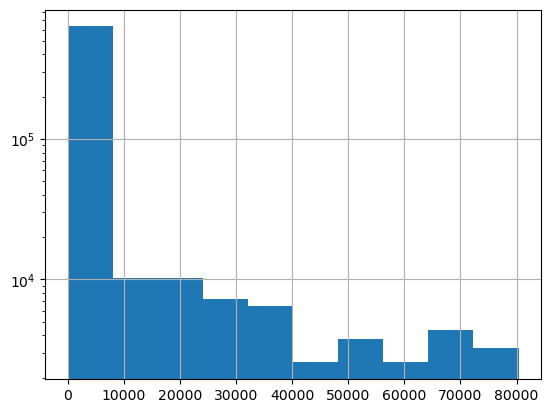

In [47]:
duration = itv.loc[(itv['t3-t0']>0) & (itv['t6-t0']>0), ['t0', 't3', 't6', 't3-t0', 't6-t0', 'waiting_time']]

duration['t3-t0'].hist(log=True) # Check distribution of duration

<Axes: >

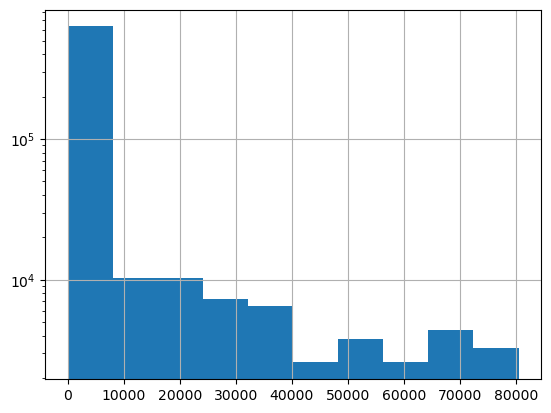

In [48]:
duration['t6-t0'].hist(log=True)

array([[<Axes: title={'center': 't3-t0'}>]], dtype=object)

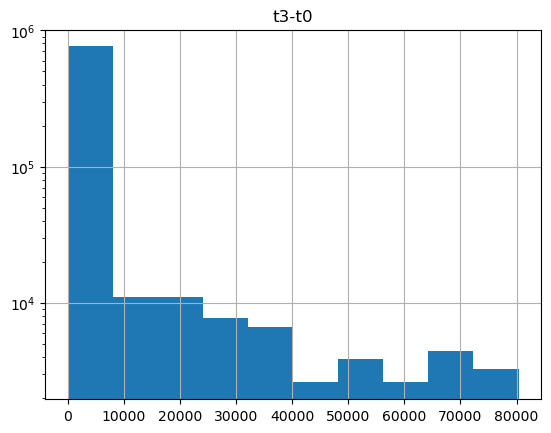

In [49]:
itv.loc[(itv['t3-t0']>0), ['t3-t0']].hist(log=True)

In [50]:
duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683233 entries, 5 to 1045543
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   t0            683233 non-null  datetime64[ns]
 1   t3            683233 non-null  datetime64[ns]
 2   t6            683233 non-null  datetime64[ns]
 3   t3-t0         683233 non-null  float64       
 4   t6-t0         683233 non-null  float64       
 5   waiting_time  425586 non-null  float64       
dtypes: datetime64[ns](3), float64(3)
memory usage: 36.5 MB


In [53]:
itv['date'] = itv['t0'].dt.date
itv.loc[(itv['t3-t0']>0), ['t3-t0']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 814056 entries, 1 to 1045543
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   t3-t0   814056 non-null  float64
dtypes: float64(1)
memory usage: 12.4 MB


In [54]:
itv.to_csv('./intervention_loc_dt_processed.csv', index=False)

In [55]:
## Set t3-t0>0 and <= 6 hours as NA

itv.loc[(itv['t3-t0']<=0) | (itv['t3-t0']>=6*60), 't3-t0'] = np.nan
itv.loc[(itv['waiting_time']<=0) | (itv['waiting_time']>=6*60), 'waiting_time'] = np.nan

itv['t3-t0'] = itv.apply(lambda x: x['waiting_time'] if pd.isna(x['t3-t0']) and pd.notna(x['waiting_time']) else x['t3-t0'], axis=1) ## fill NA in t3-t0 with the column waiting_time if 
                                                                                                                                    ##  it's not NA

<Axes: >

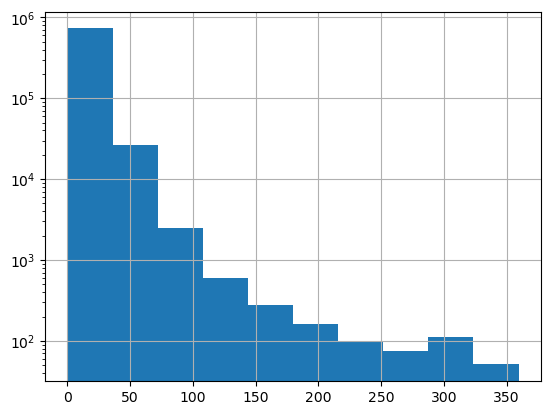

In [66]:
itv['t3-t0'].hist(log=True)

In [56]:
itv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 1045548
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        954538 non-null  int64         
 1   service_name                      857467 non-null  object        
 2   postalcode_permanence             624205 non-null  float64       
 3   cityname_permanence               658522 non-null  object        
 4   streetname_permanence             660651 non-null  object        
 5   housenumber_permanence            56478 non-null   object        
 6   latitude_permanence               869406 non-null  float64       
 7   longitude_permanence              874523 non-null  float64       
 8   permanence_short_name             950022 non-null  object        
 9   permanence_long_name              857644 non-null  object        
 10  vector_type                       93

In [57]:
itv['event_type'].value_counts() ## check event_type

event_type
P033 - Trauma                               94616
P010 - Respiratory problems                 56718
P026 - Unclear problem                      54672
P033 - TRAUMA                               47927
P019 - Unconscious - syncope                38192
                                            ...  
Medisch Interventieplan                         1
P024 CO-intoxicatie                             1
Y_GS ALGEMEEN+DGH                               1
LO (5.1.1) assistance ambulance manpower        1
FI (1.5.0) fire odour/check                     1
Name: count, Length: 318, dtype: int64

In [58]:
itv['abandon_reason'].value_counts() ## check abandon reason

abandon_reason
Weigering van vervoer      25926
Verzorgd ter plaatse       17150
Error                      14966
Zonder patient             10230
Geannuleerd                10129
Overleden                   6566
Vervoerd door politie       4665
Vervoerd door derden        3807
Weigering vervoer           1692
Loos alarm goed bedoeld      616
Kwaadwillig                  515
Geannuleerde rit             472
Vervoer door derden          369
Ter plaatste behandeld       300
Dood Ter Plaatse             130
Kwaadwillige oproep           28
Name: count, dtype: int64

In [59]:
itv['event_code'] = itv['event_type'].str.split(n=1, expand=True).iloc[:,0]
itv['event_name'] = itv['event_type'].str.split(n=1, expand=True).iloc[:,1].str.replace('-', '') ## extract event_code and event_name from event_type

In [60]:
events = pd.Series(itv['event_name'].unique()).str.lower()

events[events.str.contains('cardiac', na=False)] ## filter cardiac events

25     cardiac problem (other than thoracic pain)
30                                 cardiac arrest
dtype: object

In [61]:
itv['event_type'].value_counts().to_frame().head(20)

,count
event_type,
P033 - Trauma,94616
P010 - Respiratory problems,56718
P026 - Unclear problem,54672
P033 - TRAUMA,47927
P019 - Unconscious - syncope,38192
P011 - Chest pain,29424
P001 - Traffic accident,27902
P012 - Non-traumatic abdominal pain,27008
P010 - ADEMHALINGSMOEILIJKHEDEN,24225


In [62]:
itv.loc[itv['event_type'].str.contains('Cardiac', na=False), 'event_type'].unique()

array(['P039 - Cardiac problem (other than thoracic pain)',
       'P003 - Cardiac arrest'], dtype=object)

In [63]:
itv_aed_relevent = itv[itv['event_code'].isin(['P003', 'P039', 'P019'])] ## Filter AED related records

In [64]:
itv_aed_relevent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106090 entries, 3 to 1045541
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        106090 non-null  int64         
 1   service_name                      93585 non-null   object        
 2   postalcode_permanence             65263 non-null   float64       
 3   cityname_permanence               69330 non-null   object        
 4   streetname_permanence             69737 non-null   object        
 5   housenumber_permanence            5502 non-null    object        
 6   latitude_permanence               97116 non-null   float64       
 7   longitude_permanence              97805 non-null   float64       
 8   permanence_short_name             105786 non-null  object        
 9   permanence_long_name              93600 non-null   object        
 10  vector_type                       10

In [65]:
itv_aed_relevent.drop_duplicates(inplace=True) ## drop duplicates
itv_aed_relevent.to_csv('./intervention_aed_relevent.csv', index=False) ## save to file

/var/folders/0r/06mcd6d15nl01q_rnr4zpvr40000gn/T/ipykernel_37622/3818916947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itv_aed_relevent.drop_duplicates(inplace=True)
